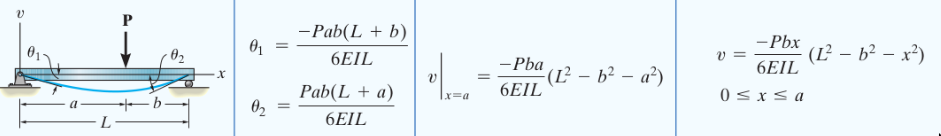

In [1]:
import sympy as sym

In [2]:
P, E, I, L, x, a, b = sym.symbols('P, E, I, L, x, a, b')

In [3]:
v1 = sym.Function('v_1')

In [4]:
R1 = P*b/L
R2 = P*a/L

M1 = R1*x

In [5]:
eq1 = sym.Eq(sym.diff(v1(x),(x,2)), M1/(E*I))
display(eq1)

Eq(Derivative(v_1(x), (x, 2)), P*b*x/(E*I*L))

In [6]:
v2 = sym.Function('v_2')

In [7]:
M2 = -P*(x-a) + R1*x

In [8]:
eq2 = sym.Eq(sym.diff(v2(x),(x,2)), M2/(E*I))
display(eq2)

Eq(Derivative(v_2(x), (x, 2)), (-P*(-a + x) + P*b*x/L)/(E*I))

In [9]:
diff_eq_soln = sym.dsolve([eq1, eq2],[v1(x), v2(x)])
display(diff_eq_soln)

[Eq(v_1(x), C1 + C2*x + P*b*x**3/(6*E*I*L)),
 Eq(v_2(x), C3 + C4*x + P*a*x**2/(2*E*I) - P*x**3*(L - b)/(6*E*I*L))]

In [10]:
v1_soln = diff_eq_soln[0].rhs
v2_soln = diff_eq_soln[1].rhs
display(v1_soln, v2_soln)

C1 + C2*x + P*b*x**3/(6*E*I*L)

C3 + C4*x + P*a*x**2/(2*E*I) - P*x**3*(L - b)/(6*E*I*L)

In [11]:
C1, C2, C3, C4 = sym.symbols('C1:5')

In [12]:
bc1_eq = sym.Eq(v1_soln.subs(x,0),0)
display(bc1_eq)

bc2_eq = sym.Eq(v2_soln.subs(x,L),0)
display(bc2_eq)

bc3_eq = sym.Eq(v1_soln.subs(x,a), v2_soln.subs(x,a))
display(bc3_eq)

bc4_eq = sym.Eq(sym.diff(v1_soln,x).subs(x,a), sym.diff(v2_soln, x).subs(x,a))
display(bc4_eq)

Eq(C1, 0)

Eq(C3 + C4*L + L**2*P*a/(2*E*I) - L**2*P*(L - b)/(6*E*I), 0)

Eq(C1 + C2*a + P*a**3*b/(6*E*I*L), C3 + C4*a + P*a**3/(2*E*I) - P*a**3*(L - b)/(6*E*I*L))

Eq(C2 + P*a**2*b/(2*E*I*L), C4 + P*a**2/(E*I) - P*a**2*(L - b)/(2*E*I*L))

In [13]:
constants = sym.solve([bc1_eq, bc2_eq, bc3_eq, bc4_eq],[C1, C2, C3, C4])
constants

{C1: 0,
 C2: (L**3*P - 3*L**2*P*a - L**2*P*b + 3*L*P*a**2 - P*a**3)/(6*E*I*L),
 C3: P*a**3/(6*E*I),
 C4: (L**3*P - 3*L**2*P*a - L**2*P*b - P*a**3)/(6*E*I*L)}

In [14]:
v1_soln_final = v1_soln.subs(constants)
display(v1_soln_final.subs(a,L-b).simplify())

P*b*x*(-L**2 + b**2 + x**2)/(6*E*I*L)